# Marriage Age Prediction 

### Steps:
* Importing Necessary Libraries
* Analysing Dataset (Performing EDA)
* Data Cleaning 
* Modelling 
* Exporting Model using Pickle

In [62]:
!ls

Notebook - Marriage Age Prediction.ipynb
age_of_marriage_data.csv


Description: The changing landscape of career has caused a significant impact on the lifestyle of working professionals. This project hopes to highlight this particular phenomenen by calcualting and comparing the age of a given working professional using the backdrop of several features listed below:
1. Gender
2. Height
3. Religion
4. Caste
5. Mother Tougue
6. Profession
7. Location 
8. Country
9. Age of Marriage - `Target Variable`

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df = pd.read_csv("age_of_marriage_data.csv")

In [65]:
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [66]:
df.shape

(2567, 10)

In [67]:
df.isna().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   height           2449 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            2425 non-null   object 
 5   mother_tongue    2403 non-null   object 
 6   profession       2237 non-null   object 
 7   location         2412 non-null   object 
 8   country          2551 non-null   object 
 9   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 200.7+ KB


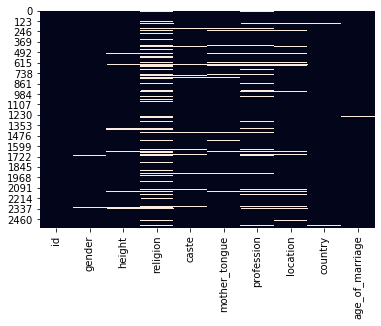

In [69]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False);

In [70]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.mean()

6.264121542656798

In [71]:
df.dropna(inplace=True)

In [72]:
df.shape

(1932, 10)

In [73]:
df.columns

Index(['id', 'gender', 'height', 'religion', 'caste', 'mother_tongue',
       'profession', 'location', 'country', 'age_of_marriage'],
      dtype='object')

In [74]:
X = df[['gender', 'height', 'religion', 'caste','country', 'mother_tongue']]
y = df['age_of_marriage']

## Modelling

In [75]:
def conv_ht(h):
    ft_in_cm = int(h.split('\'')[0])*30.48
    inch_in_cm = int(h.split('\'')[1].replace('"',''))*2.54
    ht_cm = ft_in_cm + inch_in_cm
    return ht_cm
    
X['ht_in_cm'] = X['height'].apply(conv_ht)    

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [76]:
X.head(20)

,gender,height,religion,caste,country,mother_tongue,ht_in_cm
1,male,"5'7""",Jain,Shwetamber,USA,Gujarati,170.18
2,male,"5'7""",Hindu,Brahmin,India,Hindi,170.18
3,female,"5'0""",Hindu,Thakur,India,Hindi,152.40
4,male,"5'5""",Christian,Born Again,India,Malayalam,165.10
5,male,"5'5""",Hindu,Valmiki,India,Hindi,165.10
6,female,"5'2""",Hindu,Rajput - Lodhi,India,Hindi,157.48
7,male,"5'5""",Hindu,Bhatia,India,Punjabi,165.10
8,female,"5'5""",Jain,Shwetamber,India,Gujarati,165.10
9,female,"5'1""",Hindu,Billava,India,Tulu,154.94
11,male,"5'9""",Hindu,Brahmin,India,Bengali,175.26


In [77]:
X.drop('height', inplace = True, axis = 1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
X.columns

Index(['gender', 'religion', 'caste', 'country', 'mother_tongue', 'ht_in_cm'], dtype='object')

In [79]:
from sklearn import preprocessing
category_col =['gender', 'religion', 'caste','country','mother_tongue'] 

labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    X[col] = labelEncoder.fit_transform(X[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'gender': {'female': 0, 'male': 1}, 'religion': {'Christian': 0, 'Hindu': 1, 'Jain': 2, 'Muslim': 3, 'Sikh': 4}, 'caste': {' Agarwal': 0, ' Agri': 1, ' Ahom': 2, ' Arora': 3, ' Arya Vysya': 4, ' Baidya': 5, ' Baishnab': 6, ' Baishya': 7, ' Balija': 8, ' Baniya': 9, ' Bhandari': 10, ' Bhatia': 11, ' Billava': 12, ' Born Again': 13, ' Brahmin': 14, ' Goud': 15, ' Gursikh': 16, ' Kaibarta': 17, ' Kalita': 18, ' Kayastha': 19, ' Khatri': 20, ' Kshatriya': 21, ' Lingayath': 22, ' Marthoma': 23, ' Memon': 24, ' OBC - Barber/Naayee': 25, ' Panchal': 26, ' Patel': 27, ' Rajput - Lodhi': 28, ' Ramdasia': 29, ' Roman Catholic': 30, ' Sahu': 31, ' Saini': 32, ' Scheduled Caste (SC)': 33, ' Shwetamber': 34, ' Sindhi-Sakkhar': 35, ' Thakur': 36, ' Vaishnav': 37, ' Valmiki': 38, ' Vanniyar': 39, ' Viswabrahmin': 40}, 'country': {' Australia': 0, ' Bahrain': 1, ' Bangladesh': 2, ' Canada': 3, ' Germany': 4, ' India': 5, ' Ireland': 6, ' Kuwait': 7, ' Malaysia': 8, ' Myanmar': 9, ' Netherlands': 10, 

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [81]:
import pprint
pprint.pprint(mapping_dict)

{'caste': {' Agarwal': 0,
           ' Agri': 1,
           ' Ahom': 2,
           ' Arora': 3,
           ' Arya Vysya': 4,
           ' Baidya': 5,
           ' Baishnab': 6,
           ' Baishya': 7,
           ' Balija': 8,
           ' Baniya': 9,
           ' Bhandari': 10,
           ' Bhatia': 11,
           ' Billava': 12,
           ' Born Again': 13,
           ' Brahmin': 14,
           ' Goud': 15,
           ' Gursikh': 16,
           ' Kaibarta': 17,
           ' Kalita': 18,
           ' Kayastha': 19,
           ' Khatri': 20,
           ' Kshatriya': 21,
           ' Lingayath': 22,
           ' Marthoma': 23,
           ' Memon': 24,
           ' OBC - Barber/Naayee': 25,
           ' Panchal': 26,
           ' Patel': 27,
           ' Rajput - Lodhi': 28,
           ' Ramdasia': 29,
           ' Roman Catholic': 30,
           ' Sahu': 31,
           ' Saini': 32,
           ' Scheduled Caste (SC)': 33,
           ' Shwetamber': 34,
           ' Sindhi-Sakkhar': 35,

In [82]:
X.shape, y.shape

((1932, 6), (1932,))

In [83]:
X.head(10)

,gender,religion,caste,country,mother_tongue,ht_in_cm
1,1,2,34,19,6,170.18
2,1,1,14,5,8,170.18
3,0,1,36,5,8,152.40
4,1,0,13,5,13,165.10
5,1,1,38,5,8,165.10
6,0,1,28,5,8,157.48
7,1,1,11,5,20,165.10
8,0,2,34,5,6,165.10
9,0,1,12,5,25,154.94
11,1,1,14,5,2,175.26


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state = 42)


In [85]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
y_predict = model.predict(X_test)

### Evaluation

In [92]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_predict, y_test))

MAE:  1.122961881644052


In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

pred = tree_reg.predict(X_test)
tree_mse = mean_absolute_error(y_test, pred)
print('MAE: ', mean_absolute_error(pred, y_test))

MAE:  1.2213608957795006


In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [98]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [99]:
display_scores(tree_rmse_scores)

Scores: [1.50236731 1.54585931 1.55586588 1.53660975 1.52108596 1.53477664
 1.50114254 1.50344182 1.48587687 1.46768031]
Mean: 1.51547063924838
Standard deviation: 0.026622833380818733


### Grid Search

In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30,80, 100], 'max_features': [0.2,0.4,0.6,0.8,1]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 80, 100], 'max_features': [0.2, 0.4, 0.6, 0.8, 1]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [136]:
grid_search.best_params_

{'max_features': 0.8, 'n_estimators': 100}

In [137]:
final_model = grid_search.best_estimator_

In [138]:
final_pred = final_model.predict(X_test)

In [139]:
from sklearn.metrics import mean_absolute_error, r2_score
print('MAE: ', mean_absolute_error(final_pred, y_test))
print('R2: ', r2_score(final_pred, y_test))

MAE:  1.1044048959223376
R2:  0.5321740735252473


In [119]:
# Marginal Increase in the model 1.12 to 1.10

In [149]:
model = RandomForestRegressor(n_estimators= 300, max_depth = 20, max_features=0.8)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('MAE: ', mean_absolute_error(y_predict, y_test))
print('R2: ', r2_score(y_predict, y_test))

MAE:  1.0958539866772523
R2:  0.5371944754937521


In [150]:
# Insuffient data to generalize but the model is accurate within 1 years of age 

## Export Model

In [151]:
from sklearn.externals import joblib
joblib.dump(model, 'marriage_age_prediction_model.ml')

['marriage_age_prediction_model.ml']

In [152]:
!ls

Notebook - Marriage Age Prediction.ipynb
age_of_marriage_data.csv
marriage_age_prediction_model.ml


In [153]:
import pickle
pickle.dump(model, open('model.pkl','wb'))